In [5]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr

# Load datasets
global_phone_sales = pd.read_csv('global_phone_sales.csv', delimiter=';', index_col=0)
stock_market_data = pd.read_csv('Stock Market Dataset.csv')

# Correct formatting in global phone sales dataset
global_phone_sales['Number of smartphones sold to end users worldwide from 2007 to 2023 (in million units)'] = (
    global_phone_sales['Number of smartphones sold to end users worldwide from 2007 to 2023 (in million units)']
    .str.replace('.', '').str.replace(',', '.').astype(float)
)

# Convert date to year in stock market data for merging, with dayfirst=True to handle day-month-year format
stock_market_data['Year'] = pd.to_datetime(stock_market_data['Date'], dayfirst=True).dt.year

# Extract Copper Price and group by year to get average
copper_prices = stock_market_data[['Year', 'Copper_Price']].dropna()
copper_prices = copper_prices.groupby('Year').mean().reset_index()

# Merge datasets on year
merged_data = pd.merge(global_phone_sales, copper_prices, left_on='Date', right_on='Year', how='inner')

# Perform Pearson correlation test
smartphone_sales = merged_data['Number of smartphones sold to end users worldwide from 2007 to 2023 (in million units)']
copper_prices = merged_data['Copper_Price']
correlation, p_value = pearsonr(smartphone_sales, copper_prices)

# Build and fit a linear regression model
X = sm.add_constant(smartphone_sales)  # adding a constant
model = sm.OLS(copper_prices, X).fit()
regression_summary = model.summary()

# Display results
print("Correlation Coefficient:", correlation)
print("P-value:", p_value)
print(regression_summary)



Correlation Coefficient: -0.3294662447374388
P-value: 0.5882283001497084
                            OLS Regression Results                            
Dep. Variable:           Copper_Price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                 -0.189
Method:                 Least Squares   F-statistic:                    0.3653
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.588
Time:                        14:12:02   Log-Likelihood:                -4.5363
No. Observations:                   5   AIC:                             13.07
Df Residuals:                       3   BIC:                             12.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your CSV files
file_paths = [
    'vendor-US-monthly-201901-201912.csv',
    'vendor-US-monthly-202001-202012.csv',
    'vendor-US-monthly-202101-202112.csv',
    'vendor-US-monthly-202201-202212.csv',
    'vendor-US-monthly-202301-202312.csv',
    'vendor-US-monthly-202302-202402.csv'
]

# Read and concatenate all CSV files
dfs = [pd.read_csv(fp) for fp in file_paths]
all_data = pd.concat(dfs)

# Convert 'Date' to datetime, extract year
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%Y-%m')
all_data['Year'] = all_data['Date'].dt.year

# Convert all market share columns to numeric, assuming they should be numeric
for col in all_data.columns[1:-1]:  # Exclude 'Date' and 'Year'
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate annual mean market share
annual_data = all_data.groupby('Year').mean().reset_index()

# Identify the top 3 companies and aggregate others
top_companies = annual_data.drop(columns=['Year']).mean().nlargest(3).index.tolist()
annual_data_aggregated = annual_data[['Year']].copy()
for company in annual_data.columns[1:]:
    if company in top_companies:
        annual_data_aggregated[company] = annual_data[company]
    else:
        if 'Others' not in annual_data_aggregated:
            annual_data_aggregated['Others'] = annual_data[company]
        else:
            annual_data_aggregated['Others'] += annual_data[company]

# Calculating the "Others" category correctly by subtracting the top 3 shares from 100
annual_data_aggregated['Others'] = 100 - annual_data_aggregated[top_companies].sum(axis=1)

# Plot the histogram
colors = ['skyblue', 'orange', 'lightgreen', 'grey']  # Distinct colors for each segment
annual_data_aggregated.plot(x='Year', kind='bar', stacked=True, figsize=(10, 6), color=colors,
                            title="Smartphone Market Share in the US (2019-2023)",
                            ylabel="Market Share (%)")
plt.legend(title="Company")
plt.tight_layout()
plt.show()


TypeError: Cannot use method 'nlargest' with dtype object

Standard Deviation for Silver: 3.8592881268014994
Standard Deviation for Copper: 0.7028187147883396


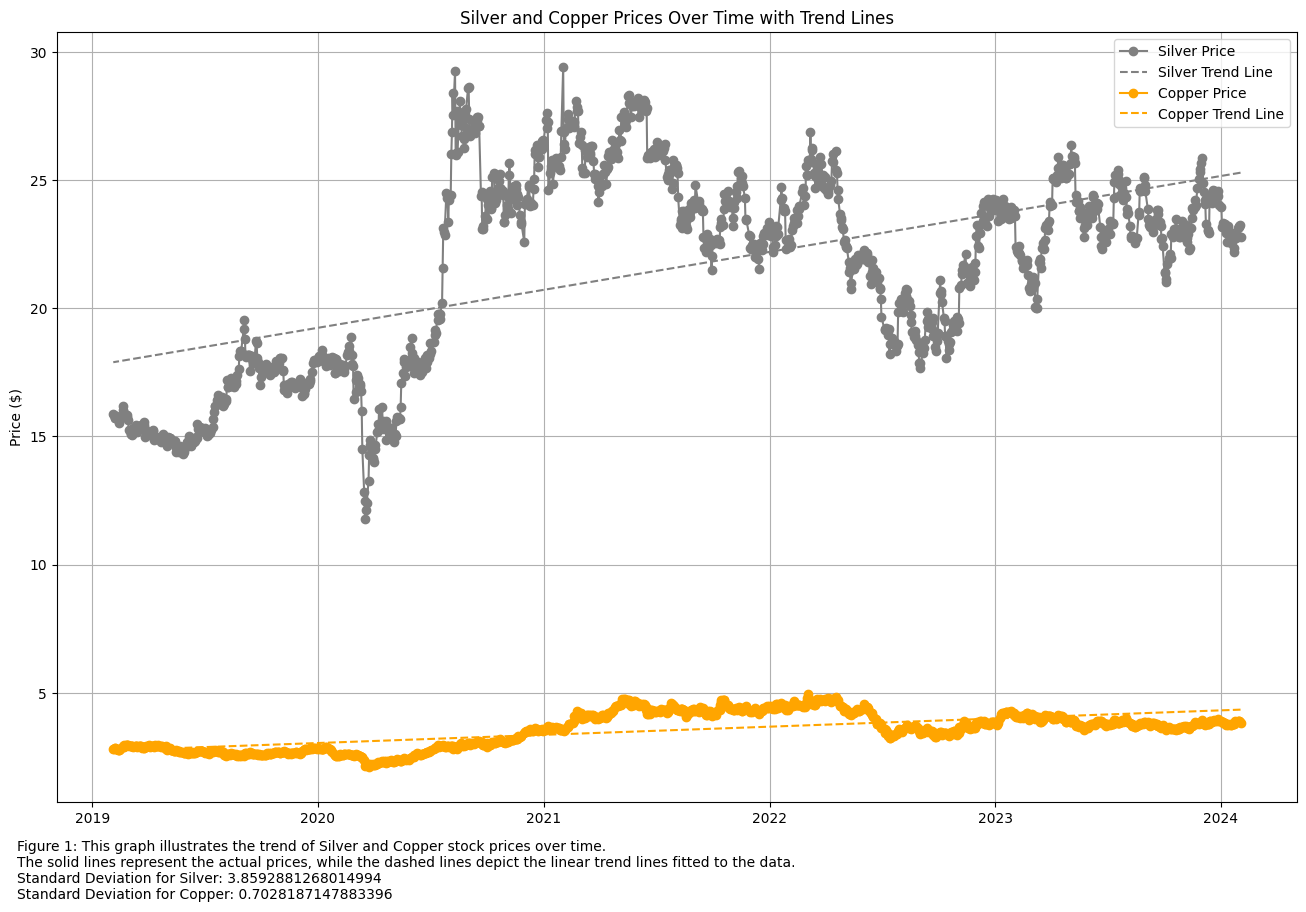

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the stock market data that contains metal prices
stock_market_data = pd.read_csv('Stock Market Dataset.csv')
stock_market_data['Date'] = pd.to_datetime(stock_market_data['Date'], format='%d-%m-%Y')  # Adjust date format accordingly

# Extracting Silver and Copper prices
silver_prices = stock_market_data[['Date', 'Silver_Price']].dropna()
copper_prices = stock_market_data[['Date', 'Copper_Price']].dropna()

# Fitting linear trend lines for Silver and Copper
silver_dates_ordinal = silver_prices['Date'].map(pd.Timestamp.toordinal)
silver_trend_coefs = np.polyfit(silver_dates_ordinal, silver_prices['Silver_Price'], 1)
silver_trendline = np.polyval(silver_trend_coefs, silver_dates_ordinal)

copper_trend_coefs = np.polyfit(silver_dates_ordinal, copper_prices['Copper_Price'], 1)
copper_trendline = np.polyval(copper_trend_coefs, silver_dates_ordinal)

# Plotting Silver and Copper prices with trend lines
plt.figure(figsize=(16, 10))
plt.plot(silver_prices['Date'], silver_prices['Silver_Price'], marker='o', linestyle='-', color='gray', label='Silver Price')
plt.plot(silver_prices['Date'], silver_trendline, color='gray', linestyle='--', label='Silver Trend Line')
plt.plot(copper_prices['Date'], copper_prices['Copper_Price'], marker='o', linestyle='-', color='orange', label='Copper Price')
plt.plot(copper_prices['Date'], copper_trendline, color='orange', linestyle='--', label='Copper Trend Line')

plt.title('Silver and Copper Prices Over Time with Trend Lines')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Adding description below the plot
description = "Figure 1: This graph illustrates the trend of Silver and Copper stock prices over time. \nThe solid lines represent the actual prices, while the dashed lines depict the linear trend lines fitted to the data. \nStandard Deviation for Silver: 3.8592881268014994 \nStandard Deviation for Copper: 0.7028187147883396"
plt.figtext(0.1, 0.01, description, ha='left', va='bottom', fontsize=10)
# Calculate standard deviations for Silver and Copper
std_dev_silver = silver_prices['Silver_Price'].std()
std_dev_copper = copper_prices['Copper_Price'].std()

print("Standard Deviation for Silver:", std_dev_silver)
print("Standard Deviation for Copper:", std_dev_copper)


Correlation between copper prices and Apple stock prices: PearsonRResult(statistic=0.7832406845553669, pvalue=8.820546356601765e-245)
Correlation between copper prices and Samsung stock prices: PearsonRResult(statistic=0.8062195065553922, pvalue=4.0506156266729245e-270)
Correlation between silver prices and Apple stock prices: PearsonRResult(statistic=0.7163184908951303, pvalue=7.51376772015207e-186)
Correlation between silver prices and Samsung stock prices: PearsonRResult(statistic=0.830750842837082, pvalue=3.171026666180002e-301)


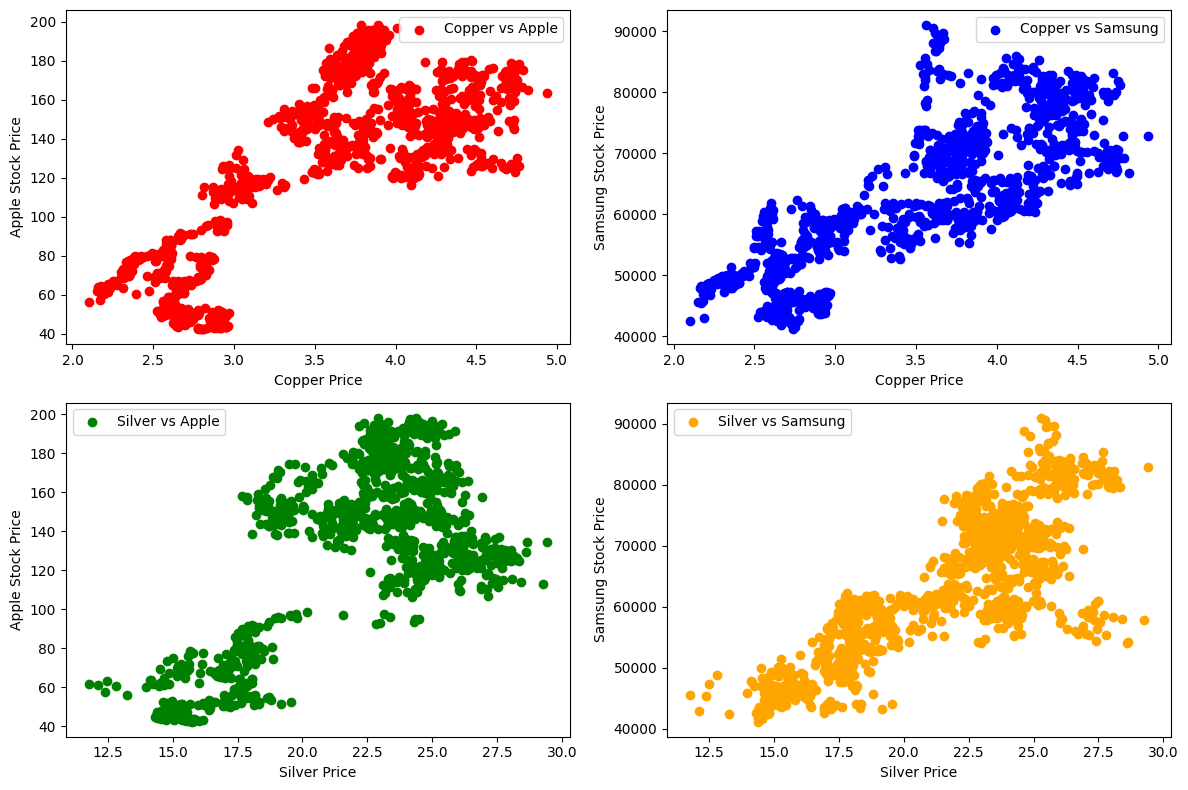

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load the stock data and metal prices
market_data = pd.read_csv('Stock Market Dataset.csv', parse_dates=['Date'], dayfirst=True)
samsung_stock = pd.read_csv('005930.KS.csv', parse_dates=['Date'])

# Merge the datasets
data = pd.merge(market_data[['Date', 'Copper_Price', 'Silver_Price', 'Apple_Price']],
                samsung_stock[['Date', 'Close']],
                on='Date', how='inner', suffixes=('_Apple', '_Samsung'))

# Drop any rows with missing data
data.dropna(inplace=True)

# Calculate Pearson correlation coefficients
corr_copper_apple = pearsonr(data['Copper_Price'], data['Apple_Price'])
corr_copper_samsung = pearsonr(data['Copper_Price'], data['Close'])
corr_silver_apple = pearsonr(data['Silver_Price'], data['Apple_Price'])
corr_silver_samsung = pearsonr(data['Silver_Price'], data['Close'])

# Output the correlation results
print("Correlation between copper prices and Apple stock prices:", corr_copper_apple)
print("Correlation between copper prices and Samsung stock prices:", corr_copper_samsung)
print("Correlation between silver prices and Apple stock prices:", corr_silver_apple)
print("Correlation between silver prices and Samsung stock prices:", corr_silver_samsung)

# Optionally plot the results for visual inspection
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(data['Copper_Price'], data['Apple_Price'], c='red', label='Copper vs Apple')
plt.xlabel('Copper Price')
plt.ylabel('Apple Stock Price')
plt.legend()

plt.subplot(222)
plt.scatter(data['Copper_Price'], data['Close'], c='blue', label='Copper vs Samsung')
plt.xlabel('Copper Price')
plt.ylabel('Samsung Stock Price')
plt.legend()

plt.subplot(223)
plt.scatter(data['Silver_Price'], data['Apple_Price'], c='green', label='Silver vs Apple')
plt.xlabel('Silver Price')
plt.ylabel('Apple Stock Price')
plt.legend()

plt.subplot(224)
plt.scatter(data['Silver_Price'], data['Close'], c='orange', label='Silver vs Samsung')
plt.xlabel('Silver Price')
plt.ylabel('Samsung Stock Price')
plt.legend()

plt.tight_layout()
plt.show()


       Copper_Price  Apple_Price
count   1243.000000  1243.000000
mean       3.541957   125.566533
std        0.702819    46.114122
min        2.100500    42.360000
25%        2.858750    79.505000
50%        3.666000   136.760000
75%        4.137250   162.915000
max        4.937500   198.110000


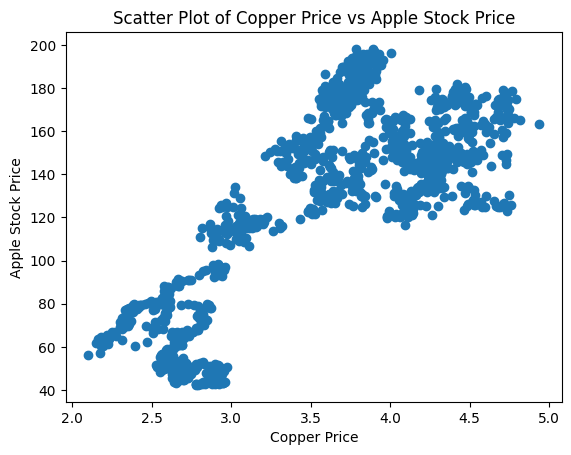

                            OLS Regression Results                            
Dep. Variable:            Apple_Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1984.
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.19e-259
Time:                        18:08:43   Log-Likelihood:                -5931.7
No. Observations:                1243   AIC:                         1.187e+04
Df Residuals:                    1241   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -56.7196      4.172    -13.596   

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
market_data = pd.read_csv('Stock Market Dataset.csv', parse_dates=['Date'])
market_data['Date'] = pd.to_datetime(market_data['Date'], dayfirst=True)
market_data.dropna(subset=['Copper_Price', 'Apple_Price'], inplace=True)

# Exploratory Data Analysis
print(market_data[['Copper_Price', 'Apple_Price']].describe())
plt.scatter(market_data['Copper_Price'], market_data['Apple_Price'])
plt.xlabel('Copper Price')
plt.ylabel('Apple Stock Price')
plt.title('Scatter Plot of Copper Price vs Apple Stock Price')
plt.show()

# Building the Linear Regression Model
X = sm.add_constant(market_data['Copper_Price'])  # adding a constant
y = market_data['Apple_Price']
model = sm.OLS(y, X).fit()

# Model Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2182.
Date:                Mon, 06 May 2024   Prob (F-statistic):          4.05e-270
Time:                        18:11:03   Log-Likelihood:                -12093.
No. Observations:                1177   AIC:                         2.419e+04
Df Residuals:                    1175   BIC:                         2.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.513e+04   1052.840     14.373   

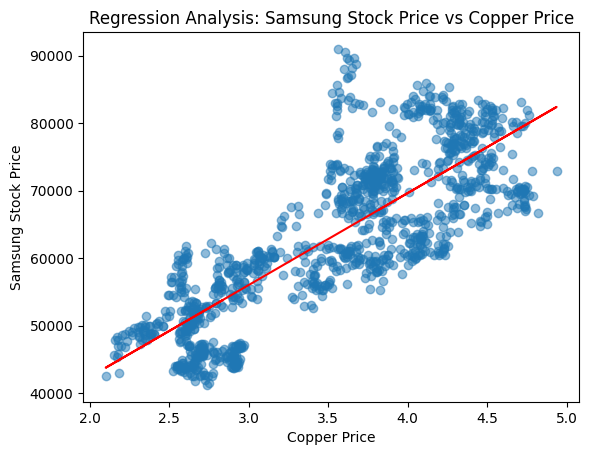

                            OLS Regression Results                            
Dep. Variable:            Apple_Price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1238.
Date:                Mon, 06 May 2024   Prob (F-statistic):          7.51e-186
Time:                        18:11:03   Log-Likelihood:                -5755.1
No. Observations:                1177   AIC:                         1.151e+04
Df Residuals:                    1175   BIC:                         1.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -59.0028      5.329    -11.072   

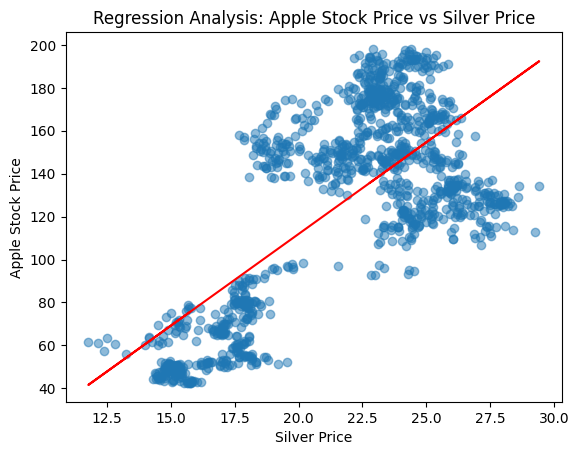

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2617.
Date:                Mon, 06 May 2024   Prob (F-statistic):          3.17e-301
Time:                        18:11:04   Log-Likelihood:                -12022.
No. Observations:                1177   AIC:                         2.405e+04
Df Residuals:                    1175   BIC:                         2.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8297.6585   1093.698      7.587   

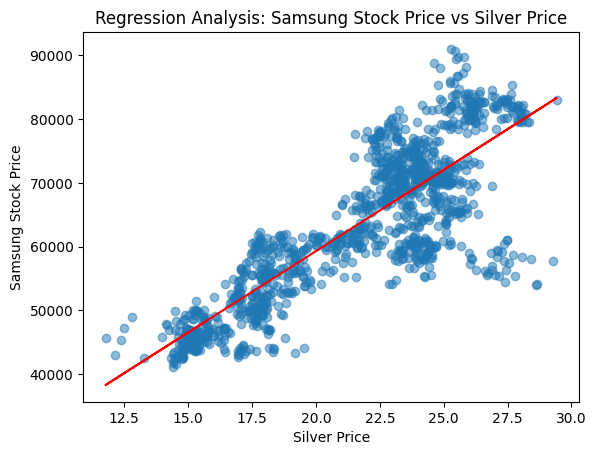

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
market_data = pd.read_csv('Stock Market Dataset.csv', parse_dates=['Date'], dayfirst=True)
samsung_stock = pd.read_csv('005930.KS.csv', parse_dates=['Date'])

# Merge the datasets
data = pd.merge(market_data, samsung_stock[['Date', 'Close']], on='Date', how='inner')
data.dropna(subset=['Copper_Price', 'Silver_Price', 'Apple_Price', 'Close'], inplace=True)

# Build and evaluate linear regression models
def build_regression(X, y, x_label, y_label):
    X = sm.add_constant(X)  # adding a constant
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Plotting the regression line and data points
    plt.scatter(X.iloc[:, 1], y, alpha=0.5)  # scatter plot of the data points
    plt.plot(X.iloc[:, 1], model.predict(X), color='red')  # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Regression Analysis: {y_label} vs {x_label}')
    plt.show()

# Copper Price vs Samsung Stock Price
build_regression(data['Copper_Price'], data['Close'], 'Copper Price', 'Samsung Stock Price')

# Silver Price vs Apple Stock Price
build_regression(data['Silver_Price'], data['Apple_Price'], 'Silver Price', 'Apple Stock Price')

# Silver Price vs Samsung Stock Price
build_regression(data['Silver_Price'], data['Close'], 'Silver Price', 'Samsung Stock Price')


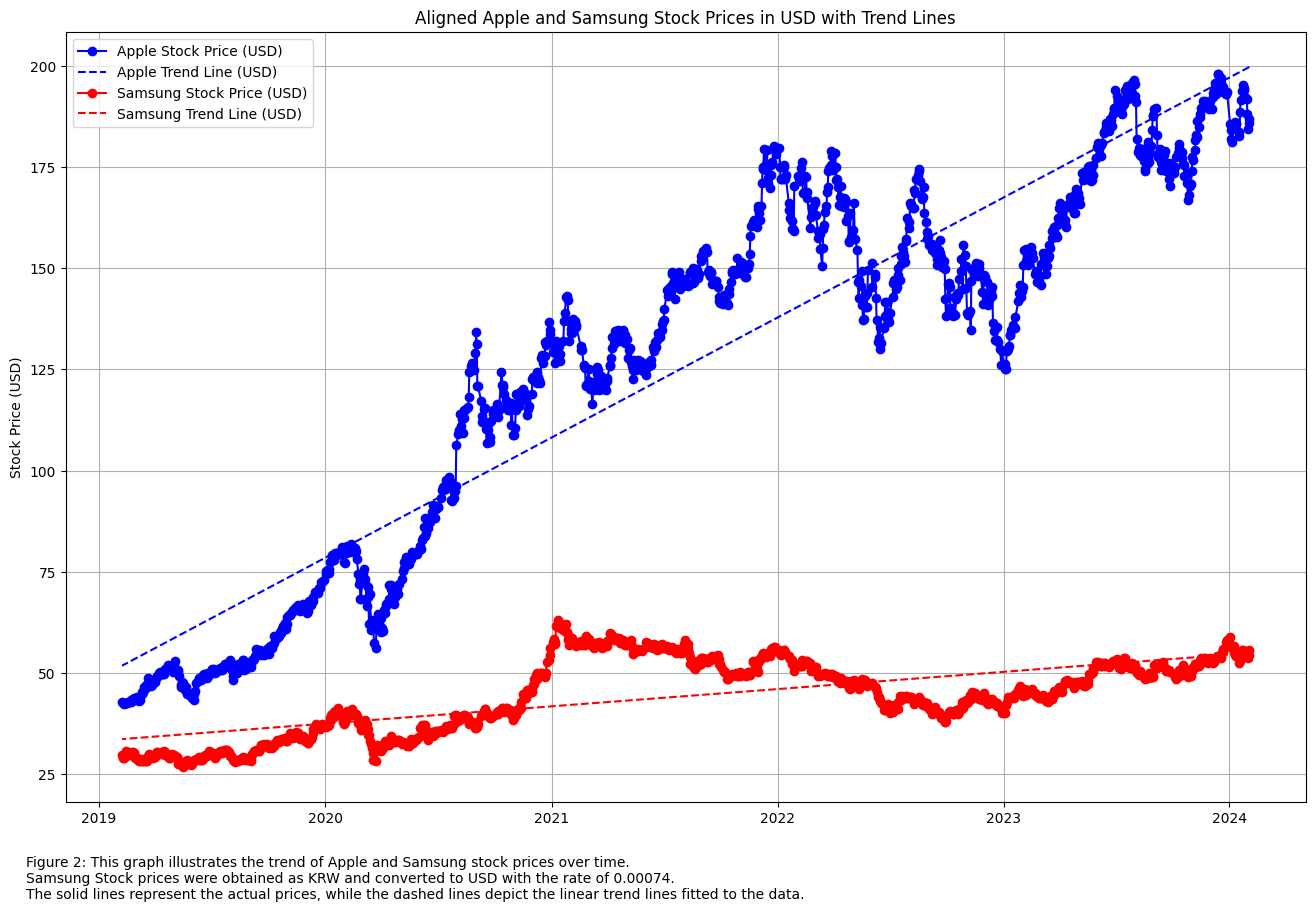

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Apple stock data
apple_stock_data = pd.read_csv('Stock Market Dataset.csv')
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'], format='%d-%m-%Y')  # Adjusted for specific format

# Load Samsung stock data
samsung_stock_data = pd.read_csv('005930.KS.csv')
samsung_stock_data['Date'] = pd.to_datetime(samsung_stock_data['Date'], format='%Y-%m-%d')  # Adjusted for specific format

# Align Apple and Samsung data by date
aligned_data = pd.merge(apple_stock_data, samsung_stock_data[['Date', 'Adj Close']], on='Date', how='inner', suffixes=('_Apple', '_Samsung'))

# Conversion rate from KRW to USD
conversion_rate_krw_to_usd = 0.00074

# Convert Samsung prices to USD
aligned_data['Samsung_Price_USD'] = aligned_data['Adj Close'] * conversion_rate_krw_to_usd

# Fitting linear trend lines for Apple and Samsung in USD
apple_dates_ordinal = aligned_data['Date'].map(pd.Timestamp.toordinal)
apple_trend_coefs_usd = np.polyfit(apple_dates_ordinal, aligned_data['Apple_Price'], 1)
apple_trendline_usd = np.polyval(apple_trend_coefs_usd, apple_dates_ordinal)

samsung_trend_coefs_usd = np.polyfit(apple_dates_ordinal, aligned_data['Samsung_Price_USD'], 1)
samsung_trendline_usd = np.polyval(samsung_trend_coefs_usd, apple_dates_ordinal)

# Plotting Apple and Samsung stock prices in USD with trend lines, using dots connected by lines
plt.figure(figsize=(16, 10))
plt.plot(aligned_data['Date'], aligned_data['Apple_Price'], marker='o', linestyle='-', color='blue', label='Apple Stock Price (USD)')
plt.plot(aligned_data['Date'], apple_trendline_usd, color='blue', linestyle='--', label='Apple Trend Line (USD)')
plt.plot(aligned_data['Date'], aligned_data['Samsung_Price_USD'], marker='o', linestyle='-', color='red', label='Samsung Stock Price (USD)')
plt.plot(aligned_data['Date'], samsung_trendline_usd, color='red', linestyle='--', label='Samsung Trend Line (USD)')

plt.title('Aligned Apple and Samsung Stock Prices in USD with Trend Lines')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
description = "Figure 2: This graph illustrates the trend of Apple and Samsung stock prices over time.\nSamsung Stock prices were obtained as KRW and converted to USD with the rate of 0.00074. \nThe solid lines represent the actual prices, while the dashed lines depict the linear trend lines fitted to the data."
plt.figtext(0.1, 0.01, description, ha='left', va='bottom', fontsize=10)
plt.show()
